In [2]:
# Get packages setup
include("higher_order_packages.jl")
using MatrixNetworks
using MAT
using PyPlot

In [4]:
# Data is from                                                                                                                                                
#     http://www.biological-networks.org/?page_id=25                                                                                                          
data = matread("data/neuronal.mat");
A = data["A"];
G = max(A, A');      # undirected version of graph                                                                                                             
U = A - min(A, A');  # unidirectional links

131x131 sparse matrix with 610 Float64 entries:
	[27 ,   1]  =  1.0
	[70 ,   1]  =  1.0
	[72 ,   1]  =  1.0
	[84 ,   1]  =  1.0
	[115,   1]  =  1.0
	[13 ,   2]  =  1.0
	[28 ,   2]  =  1.0
	[73 ,   2]  =  1.0
	[84 ,   2]  =  1.0
	[113,   2]  =  1.0
	⋮
	[119, 130]  =  1.0
	[29 , 131]  =  1.0
	[35 , 131]  =  1.0
	[59 , 131]  =  1.0
	[73 , 131]  =  1.0
	[75 , 131]  =  1.0
	[87 , 131]  =  1.0
	[88 , 131]  =  1.0
	[91 , 131]  =  1.0
	[111, 131]  =  1.0
	[112, 131]  =  1.0

In [5]:
# Weighting from bifan motif
# W_{ij} = # bifans that i and j both appear in (i != j)
W = zeros(size(A))
NA = deepcopy(G)
NA[G .== 0] = 2
NA -= 1
ai, aj = findn(triu(NA, 1))
for (x, y) in zip(ai, aj)
    xout = find(U[x, :])
    yout = find(U[y, :])
    comm = intersect(xout, yout)
    nc = size(comm, 1)
    for i = 1:nc
        for j = (i+1):nc
            w = comm[i]
            v = comm[j]
            if NA[w, v] == 1
                W[x, y] += 1
                W[x, w] += 1
                W[x, v] += 1
                W[y, w] += 1
                W[y, v] += 1
                W[w, v] += 1
            end
        end
    end
end
W = sparse(W + W');

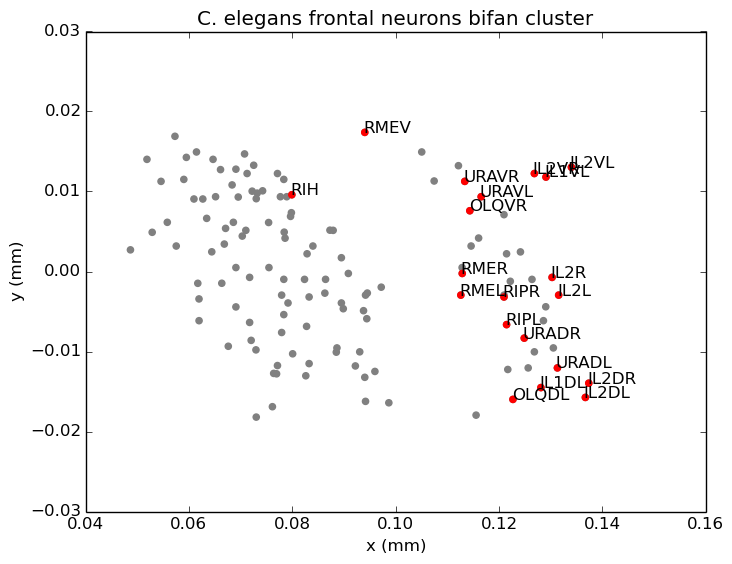

In [5]:
# Compute and draw the motif-based cluster

# Draw all nodes with true spatial coordinates  
pos = data["pos"]
scatter(pos[:,1], pos[:, 2], color="grey")
xlabel("x (mm)")
ylabel("y (mm)")
title("C. elegans frontal neurons bifan cluster")

# Draw the set found by the spectral cut with labels                                                                                                          
sc = spectral_cut(W)
comm = collect(sc.set)
scatter(pos[comm, 1], pos[comm, 2], color="red")
labels = data["labels"]
for ind in comm
    text(pos[ind, 1], pos[ind, 2], labels[ind])
end